In [573]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [574]:
# load data frame
df = pd.read_csv("organics.csv")

In [575]:
# total count of NaN values
print(df.isnull().sum())

ID                    0
DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64


In [576]:
# Remove rows with any null values
df_clean = df.dropna()

# Print the length of the cleaned DataFrame
len(df_clean)

16408

In [577]:
# Convert response from an integer to a categorical variable
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [578]:
# Print data type
print(df_clean.dtypes)

ID                   int64
DemAffl            float64
DemAge             float64
DemCluster         float64
DemClusterGroup     object
DemGender           object
DemReg              object
DemTVReg            object
PromClass           object
PromSpend          float64
PromTime           float64
TargetBuy            int64
TargetAmt            int64
dtype: object


In [579]:
# Print unique values for each column that is of object type
object_columns = df_clean.select_dtypes(include='object').columns

# Get unique values for each object column
unique_values = {col: df_clean[col].unique() for col in object_columns}
print(unique_values)

{'DemClusterGroup': array(['C', 'D', 'F', 'A', 'B', 'E', 'U'], dtype=object), 'DemGender': array(['U', 'F', 'M'], dtype=object), 'DemReg': array(['Midlands', 'North', 'South East', 'South West', 'Scottish'],
      dtype=object), 'DemTVReg': array(['Wales & West', 'Midlands', 'N West', 'East', 'N East',
       'S & S East', 'London', 'S West', 'Yorkshire', 'Border',
       'C Scotland', 'N Scot'], dtype=object), 'PromClass': array(['Gold', 'Silver', 'Tin', 'Platinum'], dtype=object)}


In [580]:
# split the data into training and testing sets
X = df.drop(['TargetBuy','TargetAmt','ID'], axis=1)
X = pd.get_dummies(X, columns=['DemClusterGroup', 'DemGender', 'DemReg','DemTVReg','PromClass'], drop_first=True, dtype='float')

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15556 entries, 20973 to 19701
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                14819 non-null  float64
 1   DemAge                 14495 non-null  float64
 2   DemCluster             15074 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15348 non-null  float64
 5   DemClusterGroup_B      15556 non-null  float64
 6   DemClusterGroup_C      15556 non-null  float64
 7   DemClusterGroup_D      15556 non-null  float64
 8   DemClusterGroup_E      15556 non-null  float64
 9   DemClusterGroup_F      15556 non-null  float64
 10  DemClusterGroup_U      15556 non-null  float64
 11  DemGender_M            15556 non-null  float64
 12  DemGender_U            15556 non-null  float64
 13  DemReg_North           15556 non-null  float64
 14  DemReg_Scottish        15556 non-null  float64
 15  Dem

# Exploratory Charts

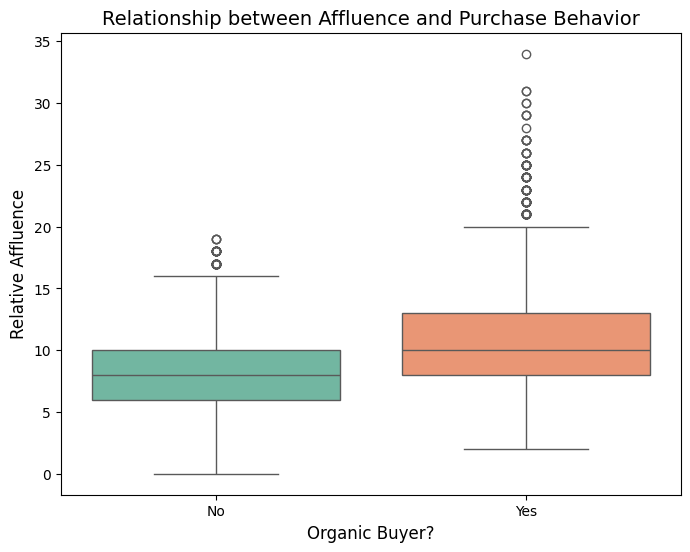

In [603]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TargetBuy', y='DemAffl', data=df_clean, palette='Set2')

# Add labels and title
plt.title('Relationship between Affluence and Purchase Behavior', fontsize=14)
plt.xlabel('Organic Buyer?', fontsize=12)
plt.ylabel('Relative Affluence', fontsize=12)

# Customize x-axis labels
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plot
plt.show()

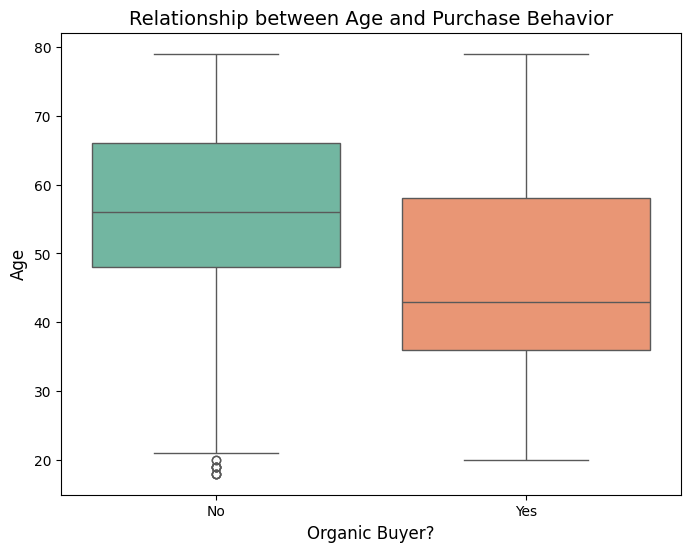

In [602]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TargetBuy', y='DemAge', data=df_clean, palette='Set2')

# Add labels and title
plt.title('Relationship between Age and Purchase Behavior', fontsize=14)
plt.xlabel('Organic Buyer?', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Customize x-axis labels
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plot
plt.show()

# Decision Tree #1

In [391]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=80, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

#this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=80)

In [392]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

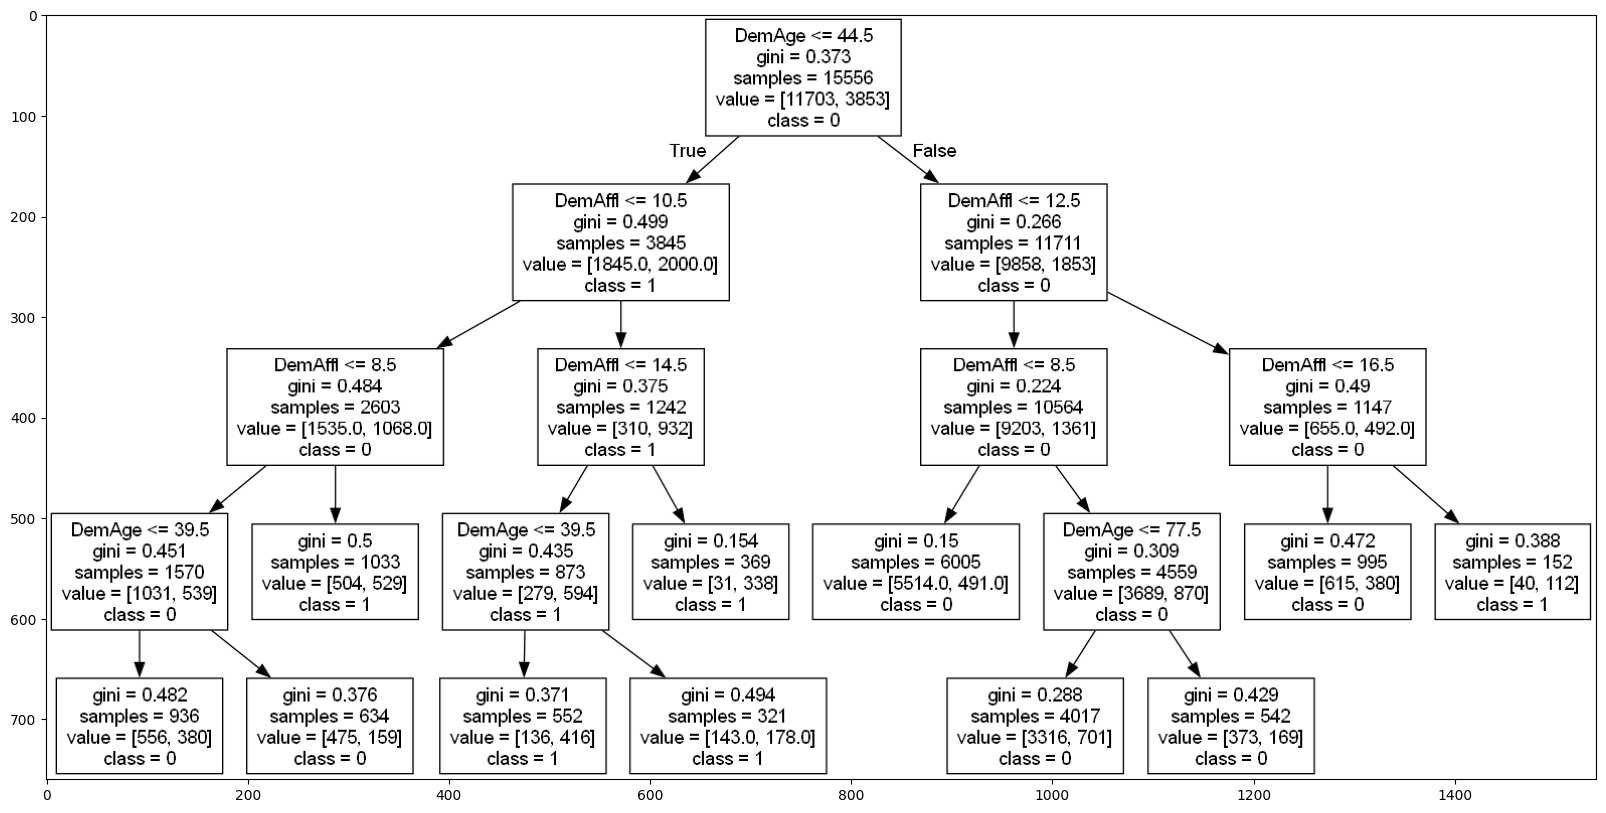

In [393]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [394]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [395]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7985
Precision: 0.6481
Recall.  : 0.4083

 -- test set -- 
Accuracy : 0.7996
Precision: 0.6531
Recall.  : 0.4080


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[10849  2280]
 [  854  1573]]
[[4657  978]
 [ 358  674]]


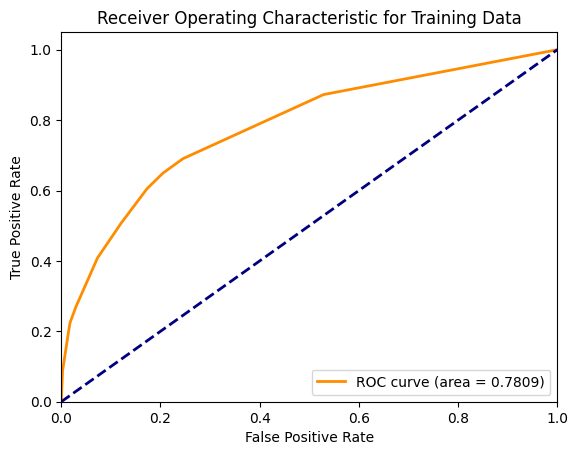

In [397]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

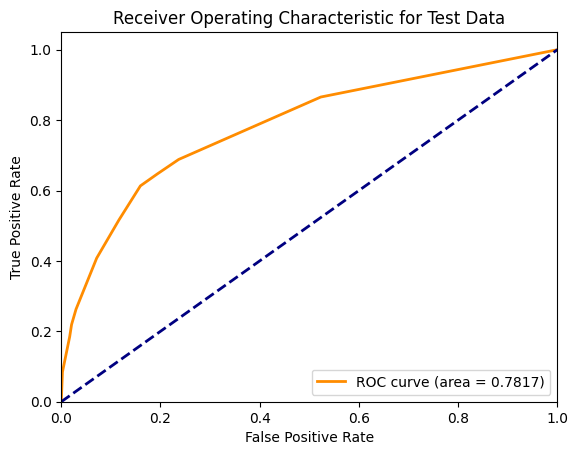

In [398]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

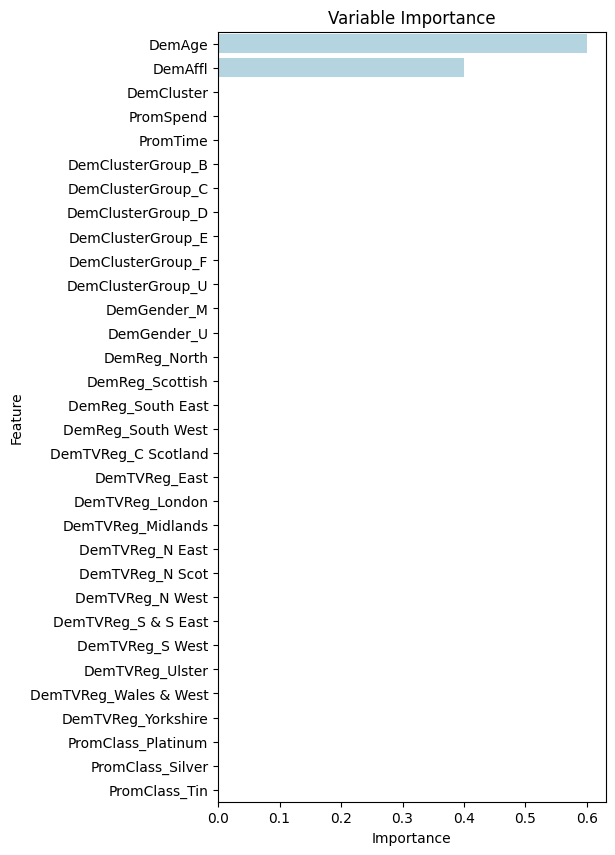

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Decision Tree #2

In [421]:
# create an instance of a decision tree classifier using other values

dt = DecisionTreeClassifier(max_depth = 20, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

#this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=20, min_samples_leaf=10)

In [422]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

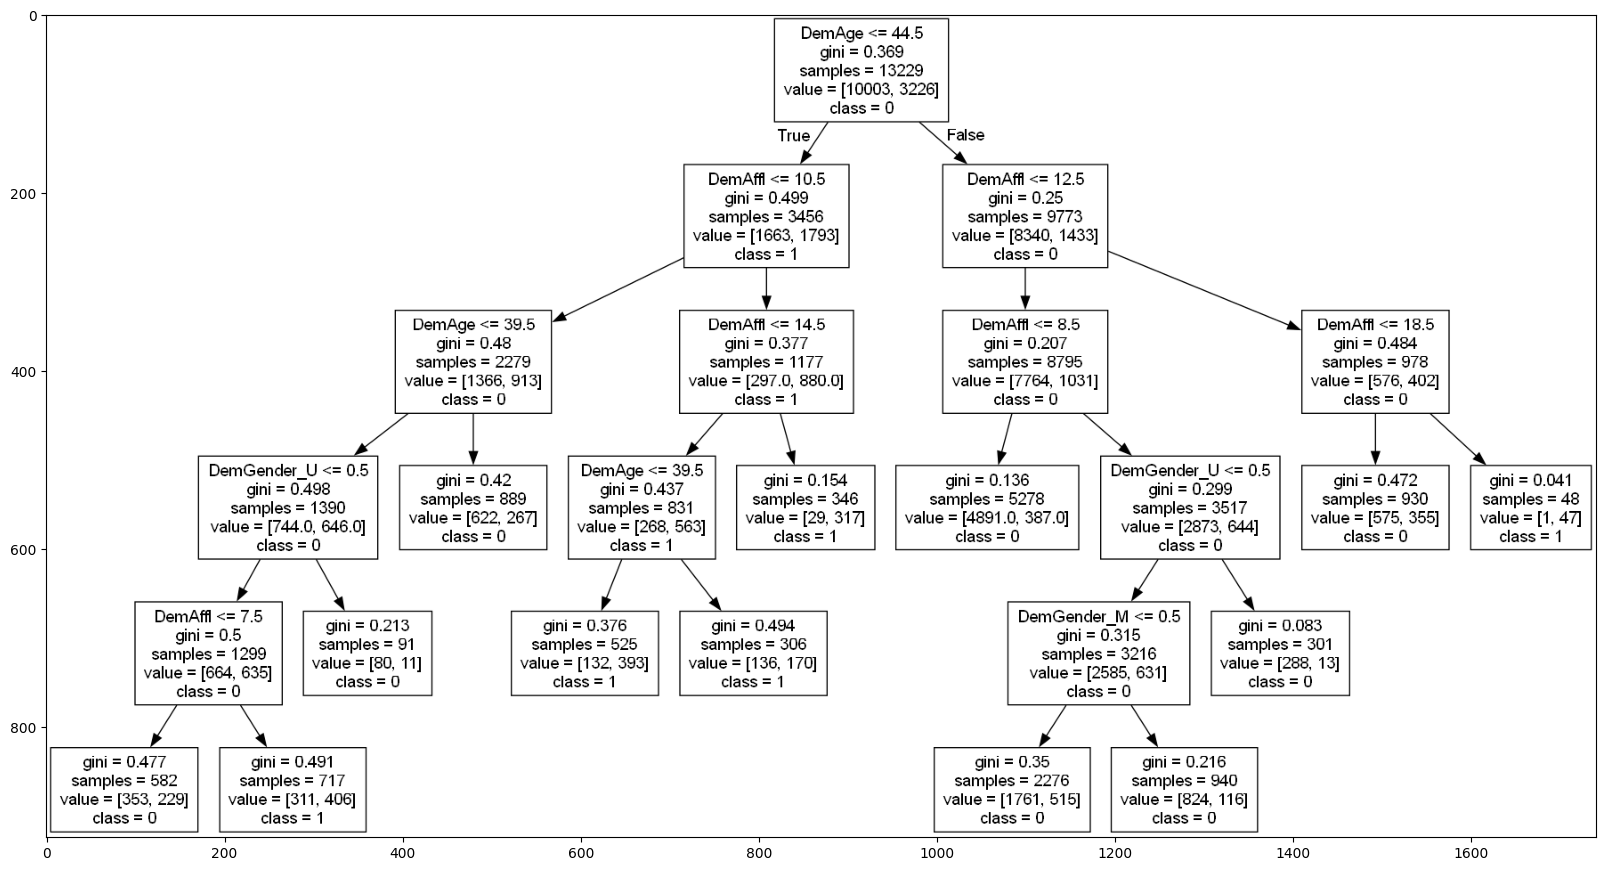

In [423]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [424]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [425]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8109
Precision: 0.6864
Recall.  : 0.4132

 -- test set -- 
Accuracy : 0.8111
Precision: 0.6899
Recall.  : 0.4085


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[9394 1893]
 [ 609 1333]]
[[4038  818]
 [ 254  565]]


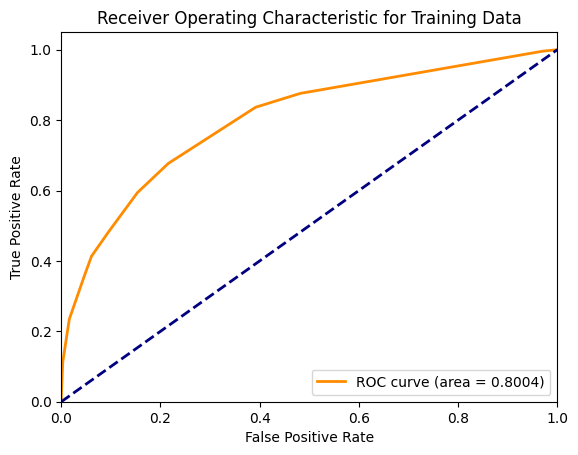

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

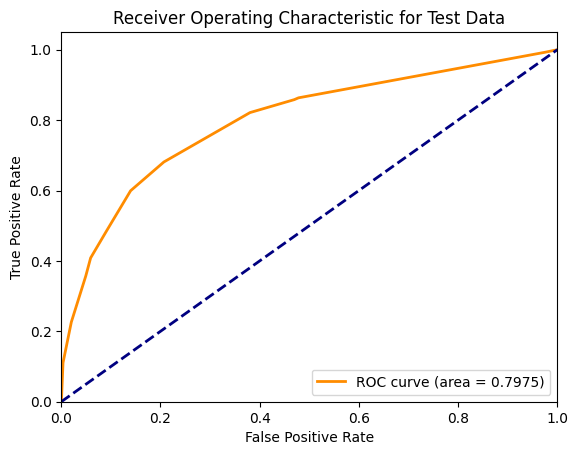

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

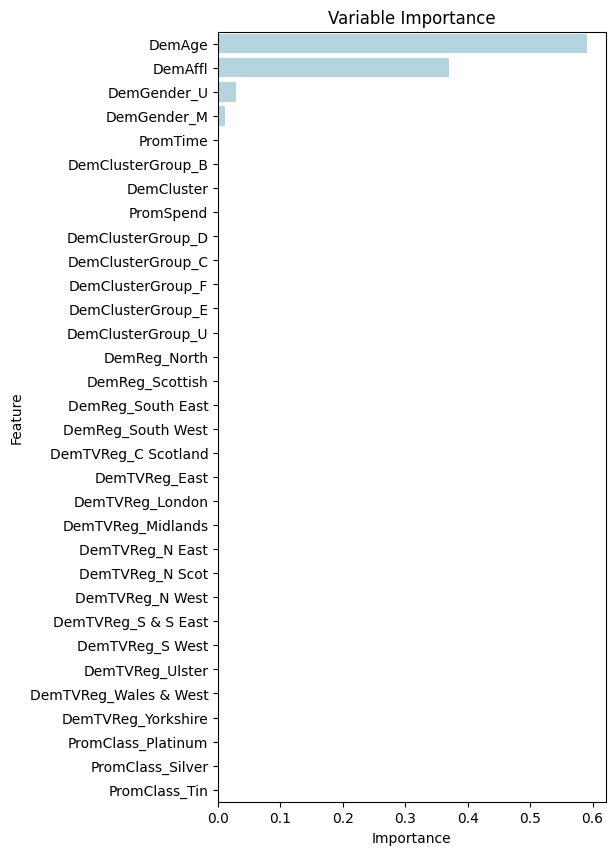

In [429]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Random Forest

In [ ]:
# create an instance of a random forest classifier using default values

#rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=904)

# fit the model to the training data
#rf.fit(X_train, y_train)

# create an instance of a random forest classifier using default values and overfitting controls

#rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=5, min_samples_leaf=100, random_state=904)

# fit the model to the training data
#rf.fit(X_train, y_train)

#'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 150

# create an instance of a random forest classifier using tuned values  (max 10 min 100)

rf = RandomForestClassifier(n_estimators=150, max_features=7, max_depth=50, min_samples_leaf=30, random_state=423)

# fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=7, min_samples_leaf=30,
                       n_estimators=150, random_state=423)

In [539]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall   : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall   : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8233
Precision: 0.7683
Recall   : 0.3946

 -- test set -- 
Accuracy : 0.8157
Precision: 0.7467
Recall   : 0.3688


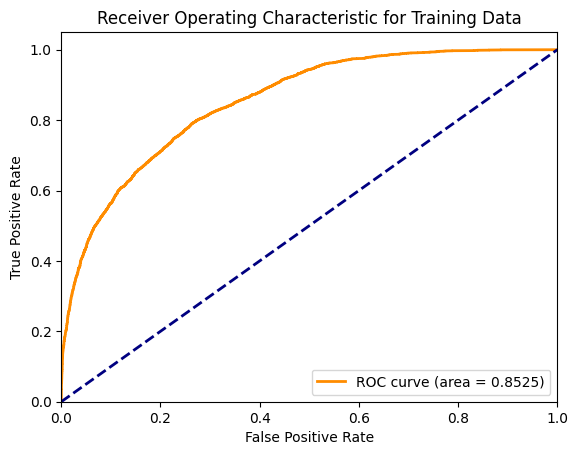

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

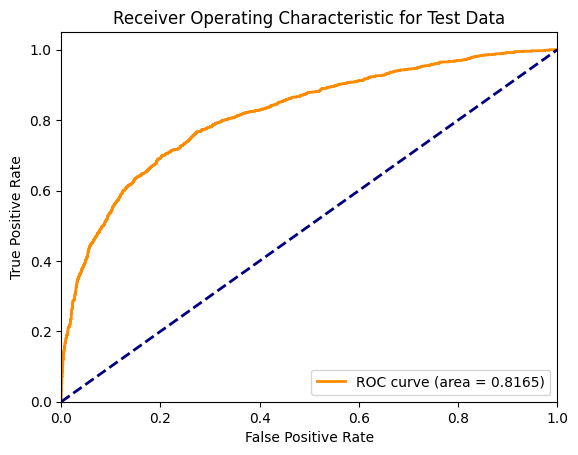

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

    importance                feature
1     0.470624                 DemAge
0     0.325953                DemAffl
3     0.035951              PromSpend
12    0.035945            DemGender_U
11    0.033549            DemGender_M
2     0.028786             DemCluster
4     0.022450               PromTime
31    0.007442          PromClass_Tin
30    0.004298       PromClass_Silver
19    0.004045        DemTVReg_London
15    0.003961      DemReg_South East
5     0.003475      DemClusterGroup_B
7     0.002923      DemClusterGroup_D
6     0.002753      DemClusterGroup_C
13    0.002712           DemReg_North
20    0.002591      DemTVReg_Midlands
9     0.002298      DemClusterGroup_F
23    0.001821        DemTVReg_N West
8     0.001506      DemClusterGroup_E
24    0.001291    DemTVReg_S & S East
18    0.001219          DemTVReg_East
27    0.001046  DemTVReg_Wales & West
29    0.000932     PromClass_Platinum
28    0.000774     DemTVReg_Yorkshire
14    0.000733        DemReg_Scottish
21    0.0002

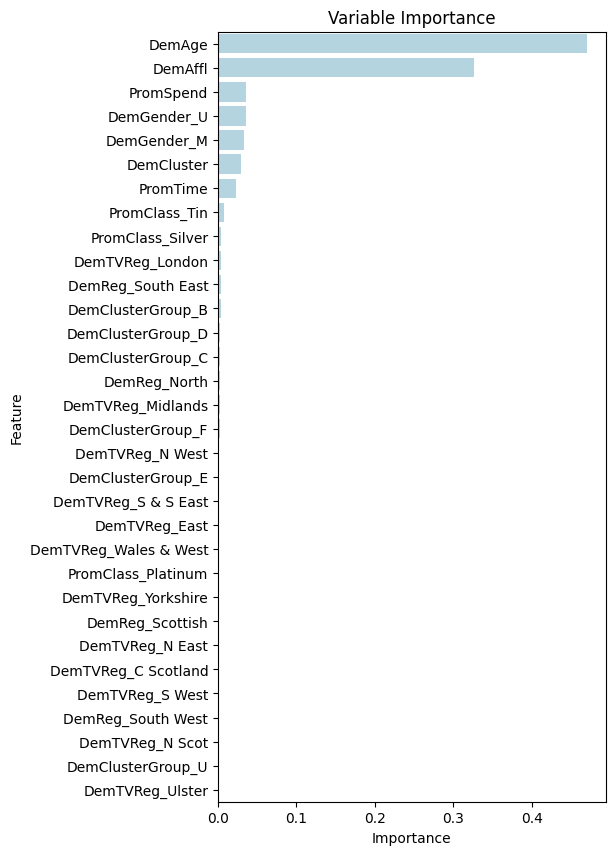

In [543]:
#calculate feature importance
rf_imp = rf.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = rf_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)
print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Gradient Boosting

In [ ]:

# create an instance of the Gradient Boosting Classifier using default values

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=3, random_state=904)

X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]


# fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=904)

In [551]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8205
Precision: 0.7147
Recall.  : 0.4396

 -- test set -- 
Accuracy : 0.8183
Precision: 0.7152
Recall.  : 0.4230


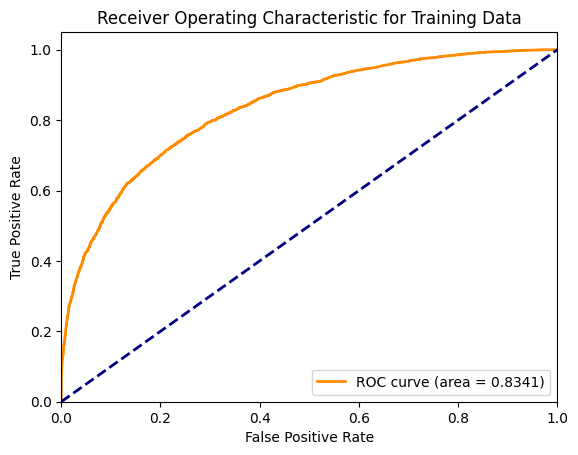

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_gb[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

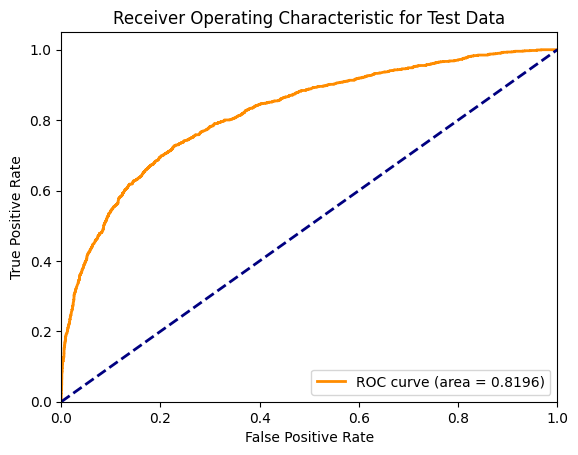

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_gb[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

    importance                feature
1     0.530366                 DemAge
0     0.357681                DemAffl
12    0.045883            DemGender_U
11    0.035093            DemGender_M
3     0.009411              PromSpend
2     0.007598             DemCluster
4     0.006065               PromTime
5     0.001676      DemClusterGroup_B
23    0.001027        DemTVReg_N West
22    0.000798        DemTVReg_N Scot
21    0.000693        DemTVReg_N East
20    0.000624      DemTVReg_Midlands
18    0.000528          DemTVReg_East
28    0.000504     DemTVReg_Yorkshire
17    0.000340    DemTVReg_C Scotland
27    0.000251  DemTVReg_Wales & West
24    0.000192    DemTVReg_S & S East
15    0.000188      DemReg_South East
7     0.000186      DemClusterGroup_D
30    0.000168       PromClass_Silver
13    0.000158           DemReg_North
6     0.000126      DemClusterGroup_C
19    0.000114        DemTVReg_London
9     0.000113      DemClusterGroup_F
16    0.000077      DemReg_South West
25    0.0000

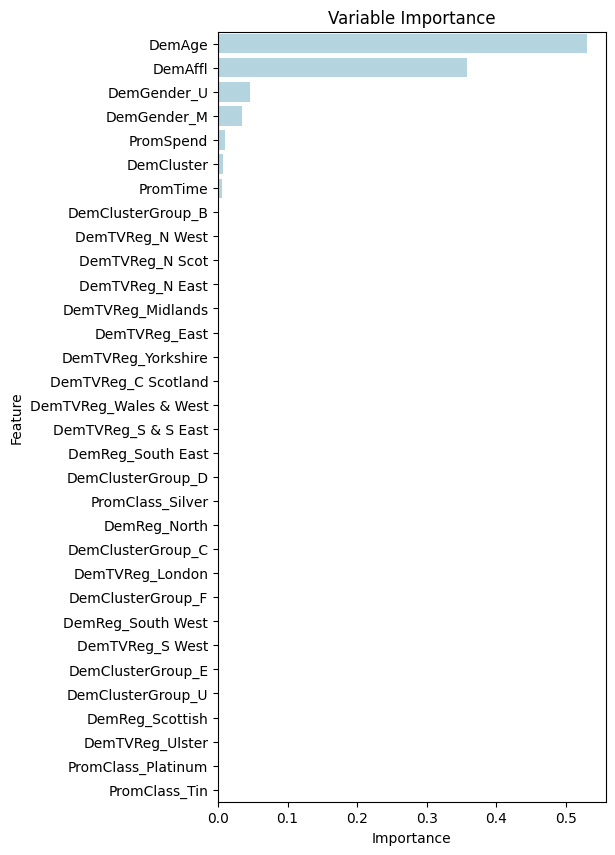

In [ ]:
#calculate feature importance
gb_imp = gb.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = gb_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()